In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib

import sklearn
from sklearn import *

In [2]:
%matplotlib inline
sns.set_theme()

# Machine Learning

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.fillna(df.mean(), inplace=True)         # Fill numeric NaNs with column mean
df.fillna(df.mode().iloc[0], inplace=True) # Fill nonnumeric NaNs with column mode
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.drop('alive', axis=1, inplace=True)

In [6]:
num_cols = df.select_dtypes(include=['number']).columns.drop('survived')
df[num_cols] = df[num_cols].apply(lambda x: (x-x.mean())/x.std()) # Standardize all numeric columns except Y
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,0.826913,male,-5.921480e-01,0.432550,-0.473408,-0.502163,S,Third,man,True,C,Southampton,False
1,1,-1.565228,female,6.384304e-01,0.432550,-0.473408,0.786404,C,First,woman,False,C,Cherbourg,False
2,1,0.826913,female,-2.845034e-01,-0.474279,-0.473408,-0.488580,S,Third,woman,False,C,Southampton,True
3,1,-1.565228,female,4.076970e-01,0.432550,-0.473408,0.420494,S,First,woman,False,C,Southampton,False
4,0,0.826913,male,4.076970e-01,-0.474279,-0.473408,-0.486064,S,Third,man,True,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369158,male,-2.075923e-01,-0.474279,-0.473408,-0.386454,S,Second,man,True,C,Southampton,True
887,1,-1.565228,female,-8.228815e-01,-0.474279,-0.473408,-0.044356,S,First,woman,False,B,Southampton,True
888,0,0.826913,female,4.371893e-15,0.432550,2.007806,-0.176164,S,Third,woman,False,C,Southampton,False
889,1,-1.565228,male,-2.845034e-01,-0.474279,-0.473408,-0.044356,C,First,man,True,C,Cherbourg,True


In [7]:
df = pd.get_dummies(df, columns=df.columns[df.dtypes=='object']) # OneHotEncode all nonnumeric columns
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0.826913,-5.921480e-01,0.432550,-0.473408,-0.502163,True,False,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,-1.565228,6.384304e-01,0.432550,-0.473408,0.786404,False,False,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0.826913,-2.845034e-01,-0.474279,-0.473408,-0.488580,False,True,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,-1.565228,4.076970e-01,0.432550,-0.473408,0.420494,False,False,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0.826913,4.076970e-01,-0.474279,-0.473408,-0.486064,True,True,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369158,-2.075923e-01,-0.474279,-0.473408,-0.386454,True,True,0,1,...,0,0,1,0,0,0,0,0,0,1
887,1,-1.565228,-8.228815e-01,-0.474279,-0.473408,-0.044356,False,True,1,0,...,0,1,0,0,0,0,0,0,0,1
888,0,0.826913,4.371893e-15,0.432550,2.007806,-0.176164,False,False,1,0,...,0,0,1,0,0,0,0,0,0,1
889,1,-1.565228,-2.845034e-01,-0.474279,-0.473408,-0.044356,True,True,0,1,...,0,0,1,0,0,0,0,1,0,0


In [8]:
sns.set(rc={'figure.figsize':(12,12)})

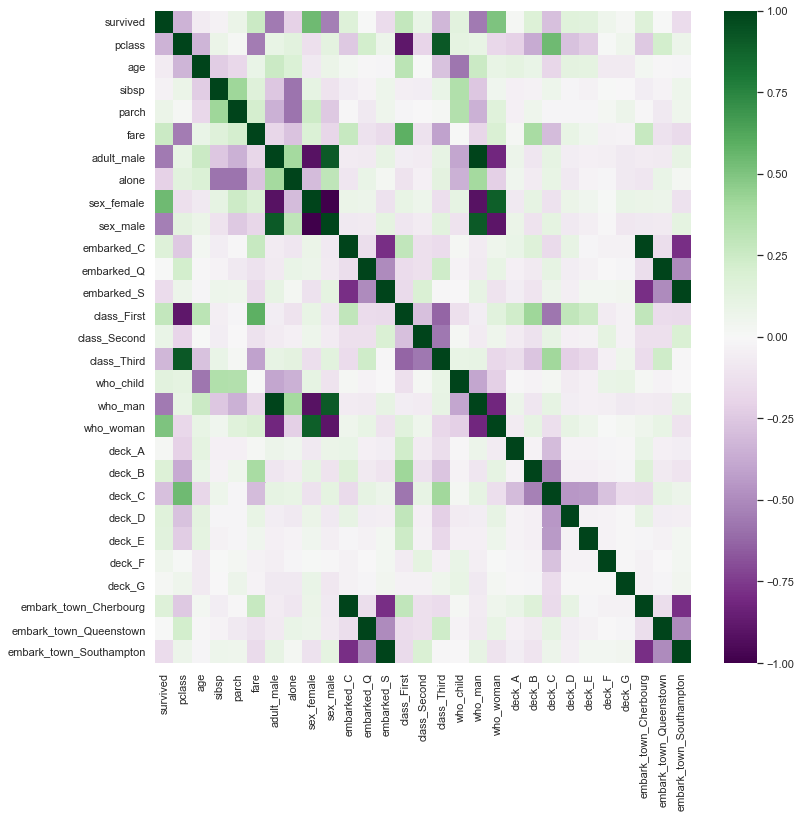

In [9]:
sns.heatmap(df.corr(), cmap='PRGn');

In [10]:
vals = df.values.astype(np.float64) # get numeric array
X = vals[:,1:] # get X
Y = vals[:,0] # get Y
X.shape, Y.shape

((891, 28), (891,))

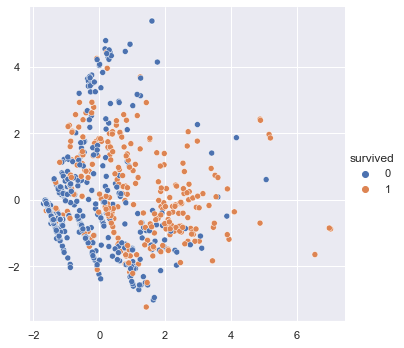

In [11]:
pca = sklearn.decomposition.PCA(n_components=5)
newx = pca.fit_transform(X)
sns.relplot(x=newx[:,0], y=newx[:,1], hue=df.survived);